In [2]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import time

In [3]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Ensure labels are integers (no one-hot encoding)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print (X_train.shape )
print (X_test.shape )

(40000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:

# Create model function
def create_model(optimizer):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(32, 32, 3)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# SGD with Warm Restarts optimizer
optimizer = SGD(learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate =0.001,
    decay_steps =1000,
    decay_rate =0.96,
    staircase =False
))

In [5]:
from tensorflow.keras.callbacks import EarlyStopping


# Train and evaluate model
start_time = time.time()
model = create_model(optimizer)
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stop], verbose=1)
end_time = time.time()

# Record training time
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/50
625/625 [==============================] - 5s 8ms/step - loss: 2.1772 - accuracy: 0.2069 - val_loss: 2.0739 - val_accuracy: 0.2672
Epoch 2/50
625/625 [==============================] - 5s 8ms/step - loss: 2.0218 - accuracy: 0.2835 - val_loss: 1.9865 - val_accuracy: 0.2977
Epoch 3/50
625/625 [==============================] - 4s 7ms/step - loss: 1.9571 - accuracy: 0.3135 - val_loss: 1.9369 - val_accuracy: 0.3236
Epoch 4/50
625/625 [==============================] - 4s 6ms/step - loss: 1.9173 - accuracy: 0.3325 - val_loss: 1.9036 - val_accuracy: 0.3327
Epoch 5/50
625/625 [==============================] - 6s 10ms/step - loss: 1.8899 - accuracy: 0.3434 - val_loss: 1.8819 - val_accuracy: 0.3411
Epoch 6/50
625/625 [==============================] - 4s 6ms/step - loss: 1.8686 - accuracy: 0.3505 - val_loss: 1.8620 - val_accuracy: 0.3487
Epoch 7/50
625/625 [==============================] - 4s 7ms/step - loss: 1.8517 - accuracy: 0.3570 - val_loss: 1.8462 - val_accuracy: 0.3552
Epoch

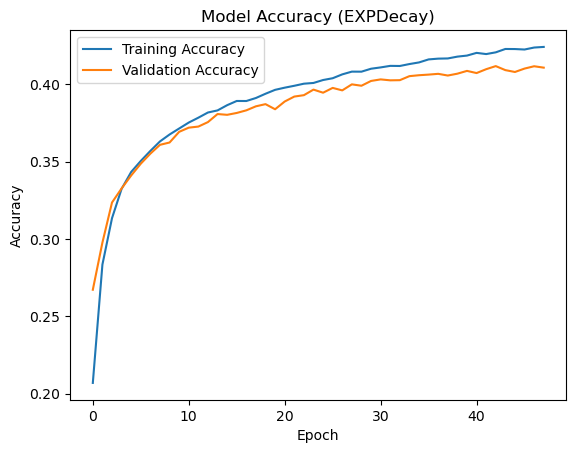

313/313 [==============================] - 5s 15ms/step


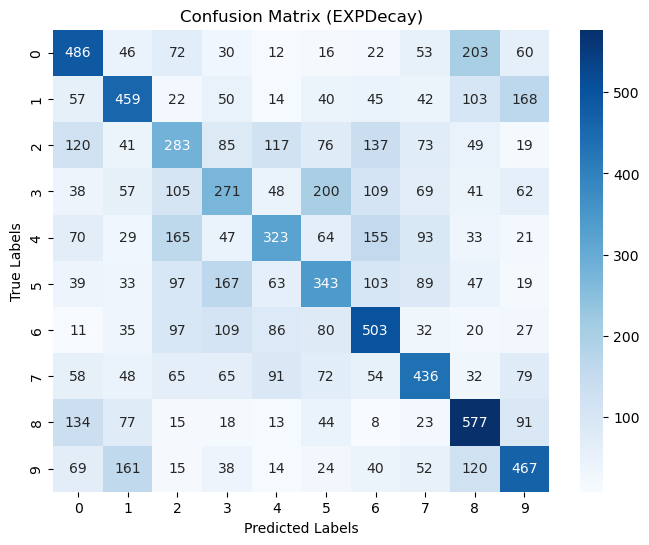

In [6]:
# Plot training and validation accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy (EXPDecay)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion Matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix (EXPDecay)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

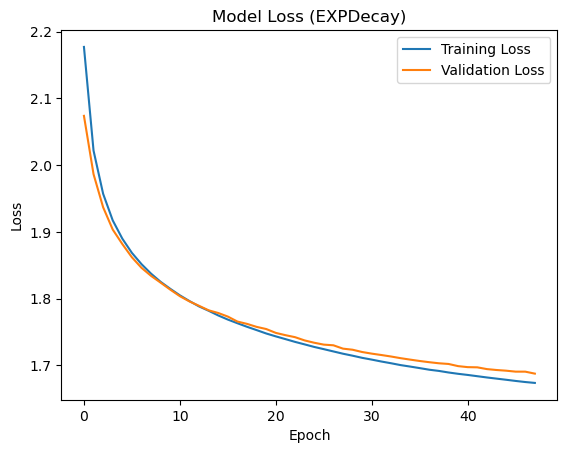

In [7]:
# Plot training and validation accuracy
accuracy = history.history['loss']
val_accuracy = history.history['val_loss']
plt.plot(accuracy, label='Training Loss')
plt.plot(val_accuracy, label='Validation Loss')
plt.title('Model Loss (EXPDecay)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()